Saving archive.zip to archive (1).zip
Dataset loaded with 1000 rows and 8 columns

First 5 rows:
   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  

=== Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
Ra

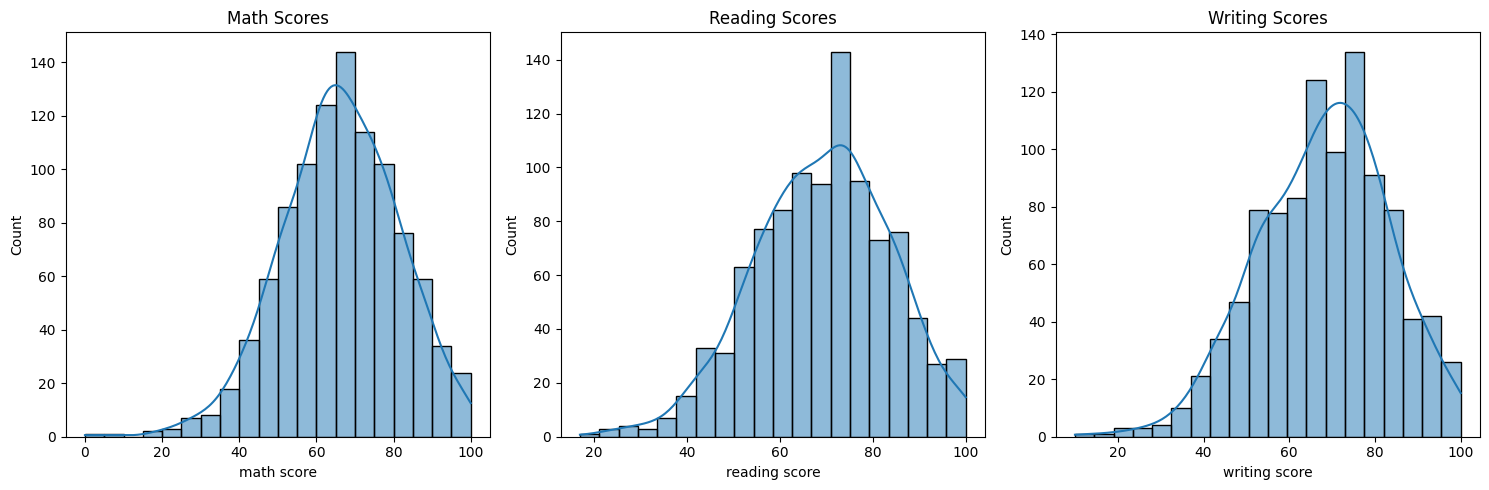

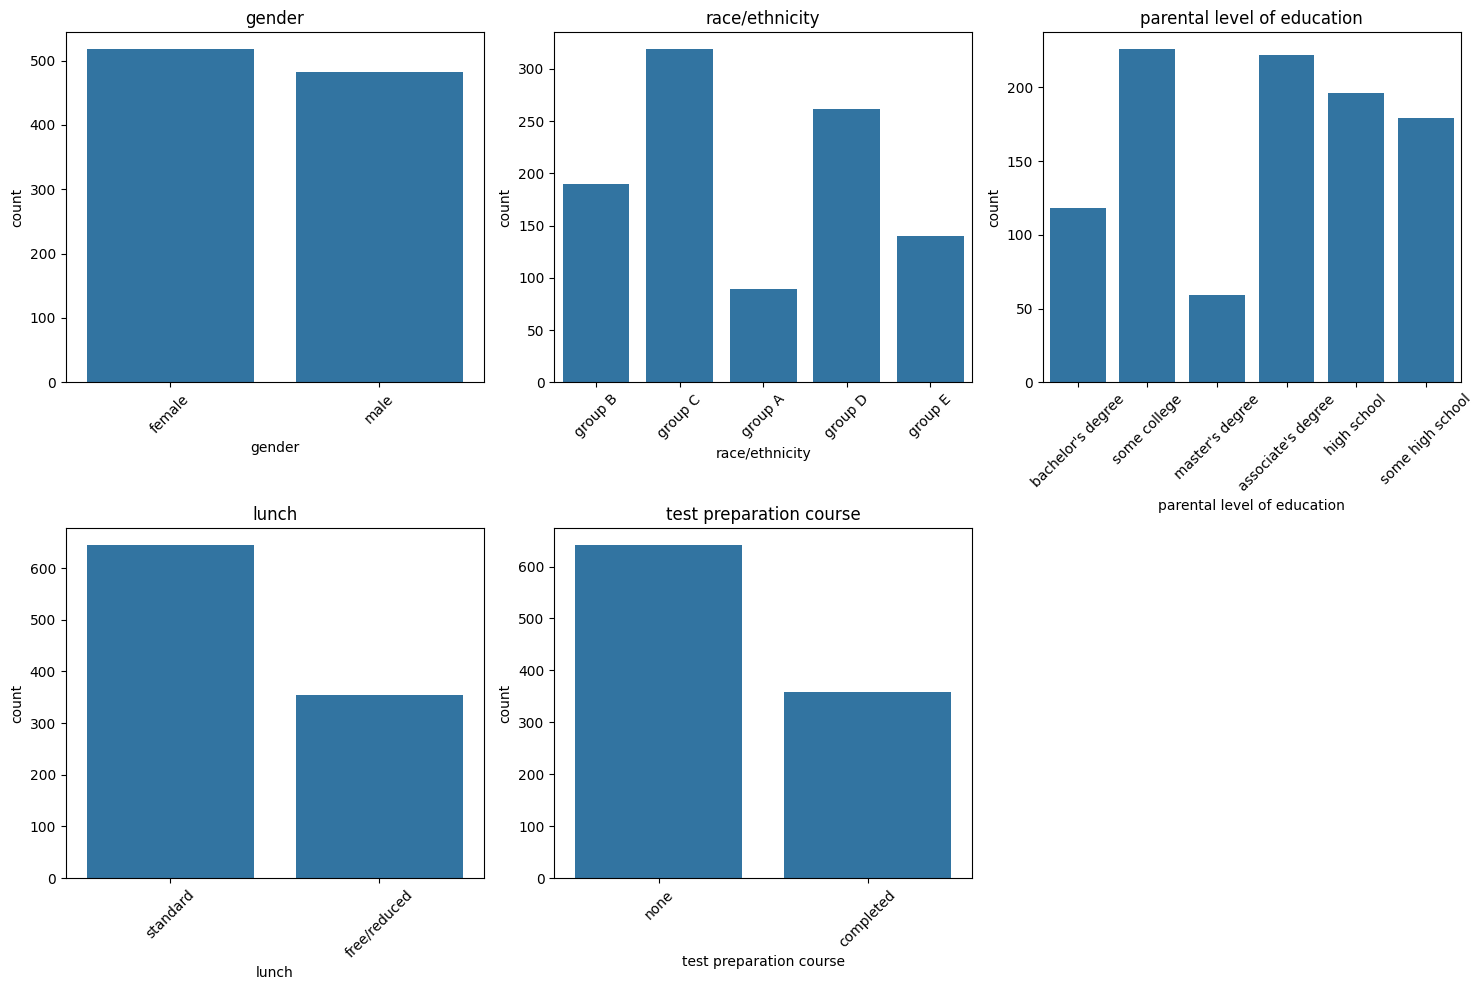

In [12]:
from google.colab import files
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


uploaded = files.upload()
with zipfile.ZipFile('archive.zip', 'r') as zip_ref:
    zip_ref.extractall()


df = pd.read_csv('StudentsPerformance.csv')
print(f"Dataset loaded with {df.shape[0]} rows and {df.shape[1]} columns")
print("\nFirst 5 rows:")
print(df.head())

def explore_data(df):
    """Perform initial exploration of the dataset"""
    print("\n=== Dataset Info ===")
    print(df.info())

    print("\n=== Missing Values ===")
    print(df.isnull().sum())

    print("\n=== Descriptive Statistics ===")
    print(df.describe())


    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    sns.histplot(df['math score'], bins=20, kde=True)
    plt.title('Math Scores')

    plt.subplot(1, 3, 2)
    sns.histplot(df['reading score'], bins=20, kde=True)
    plt.title('Reading Scores')

    plt.subplot(1, 3, 3)
    sns.histplot(df['writing score'], bins=20, kde=True)
    plt.title('Writing Scores')
    plt.tight_layout()
    plt.show()


    cat_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
    plt.figure(figsize=(15, 10))
    for i, col in enumerate(cat_cols, 1):
        plt.subplot(2, 3, i)
        sns.countplot(data=df, x=col)
        plt.xticks(rotation=45)
        plt.title(col)
    plt.tight_layout()
    plt.show()

explore_data(df)

In [13]:
from sklearn.model_selection import train_test_split

def preprocess_data(df, pass_threshold=60):
    df['average_score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)
    df['pass'] = df['average_score'].apply(lambda x: 1 if x >= pass_threshold else 0)

    categorical_features = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
    df_processed = pd.get_dummies(df, columns=categorical_features, drop_first=True)

    X = df_processed.drop(['pass', 'average_score', 'math score', 'reading score', 'writing score'], axis=1, errors='ignore')
    y = df_processed['pass']
    return df_processed, X, y

def split_data(X, y, test_size=0.2, random_state=42):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state, stratify=y)
    print(f"\nData split into:\n- Training set: {X_train.shape[0]} samples\n- Test set: {X_test.shape[0]} samples")
    return X_train, X_test, y_train, y_test


df_processed, X, y = preprocess_data(df)
X_train, X_test, y_train, y_test = split_data(X, y)


Data split into:
- Training set: 800 samples
- Test set: 200 samples


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

def train_models(X_train, y_train):
    log_reg = LogisticRegression(max_iter=1000, random_state=42)
    decision_tree = DecisionTreeClassifier(random_state=42, max_depth=5)

    print("\nTraining Logistic Regression...")
    log_reg.fit(X_train, y_train)
    print("Training Decision Tree...")
    decision_tree.fit(X_train, y_train)
    return log_reg, decision_tree


log_reg, decision_tree = train_models(X_train, y_train)


Training Logistic Regression...
Training Decision Tree...



=== Logistic Regression Performance ===
Accuracy: 0.68
Precision: 0.73

Confusion Matrix:
 [[ 12  45]
 [ 19 124]]

Classification Report:
               precision    recall  f1-score   support

           0       0.39      0.21      0.27        57
           1       0.73      0.87      0.79       143

    accuracy                           0.68       200
   macro avg       0.56      0.54      0.53       200
weighted avg       0.63      0.68      0.65       200



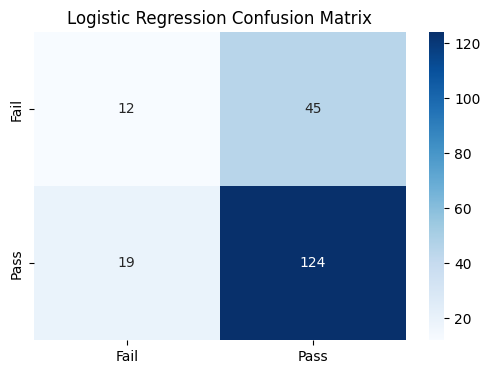


=== Decision Tree Performance ===
Accuracy: 0.66
Precision: 0.74

Confusion Matrix:
 [[ 16  41]
 [ 27 116]]

Classification Report:
               precision    recall  f1-score   support

           0       0.37      0.28      0.32        57
           1       0.74      0.81      0.77       143

    accuracy                           0.66       200
   macro avg       0.56      0.55      0.55       200
weighted avg       0.63      0.66      0.64       200



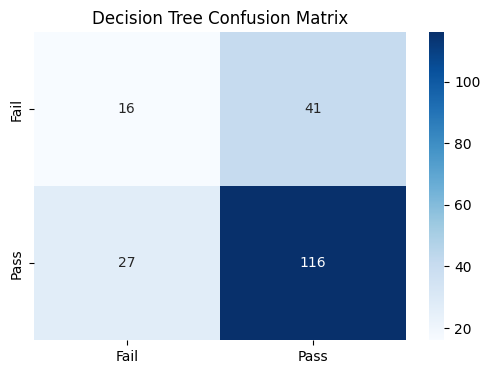


=== Model Comparison ===
                 Model  Accuracy  Precision
0  Logistic Regression      0.68   0.733728
1        Decision Tree      0.66   0.738854


In [15]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report

def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    print(f"\n=== {model_name} Performance ===")
    print(f"Accuracy: {accuracy:.2f}\nPrecision: {precision:.2f}")
    print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
                xticklabels=['Fail', 'Pass'], yticklabels=['Fail', 'Pass'])
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()
    return accuracy, precision

def compare_models(models, X_test, y_test):
    results = []
    for name, model in models.items():
        accuracy, precision = evaluate_model(model, X_test, y_test, name)
        results.append({'Model': name, 'Accuracy': accuracy, 'Precision': precision})

    comparison_df = pd.DataFrame(results)
    print("\n=== Model Comparison ===")
    print(comparison_df)
    return comparison_df

models = {'Logistic Regression': log_reg, 'Decision Tree': decision_tree}
comparison_df = compare_models(models, X_test, y_test)


=== Logistic Regression Feature Coefficients ===
                                          Feature  Coefficient
10                                 lunch_standard     1.307227
5   parental level of education_bachelor's degree     0.876102
4                          race/ethnicity_group E     0.841697
3                          race/ethnicity_group D     0.738373
7     parental level of education_master's degree     0.714066
1                          race/ethnicity_group B     0.531072
2                          race/ethnicity_group C     0.375861
8        parental level of education_some college     0.120542
6         parental level of education_high school    -0.402524
9    parental level of education_some high school    -0.414835

Top Positive Influences:
                                           Feature  Coefficient
10                                 lunch_standard     1.307227
5   parental level of education_bachelor's degree     0.876102
4                          race/ethnicity

<Figure size 1000x600 with 0 Axes>

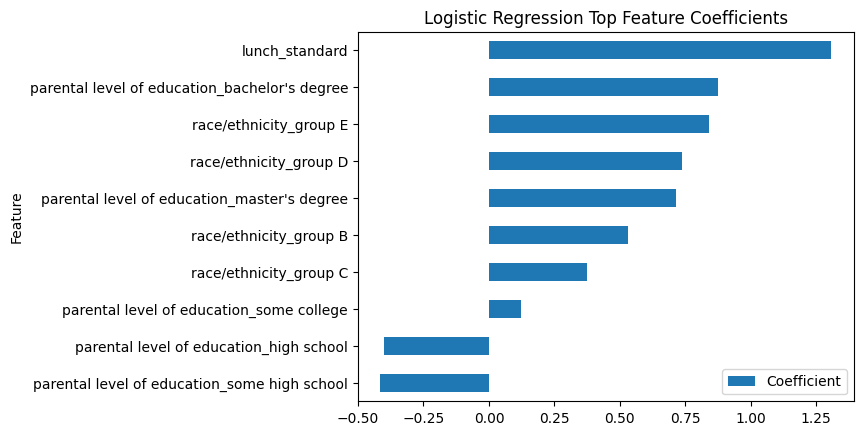


=== Decision Tree Feature Importances ===
                                          Feature  Importance
10                                 lunch_standard    0.343926
11                   test preparation course_none    0.326549
5   parental level of education_bachelor's degree    0.080280
0                                     gender_male    0.065864
7     parental level of education_master's degree    0.050999
9    parental level of education_some high school    0.031266
6         parental level of education_high school    0.029072
2                          race/ethnicity_group C    0.028392
4                          race/ethnicity_group E    0.013929
3                          race/ethnicity_group D    0.013456


<Figure size 1000x600 with 0 Axes>

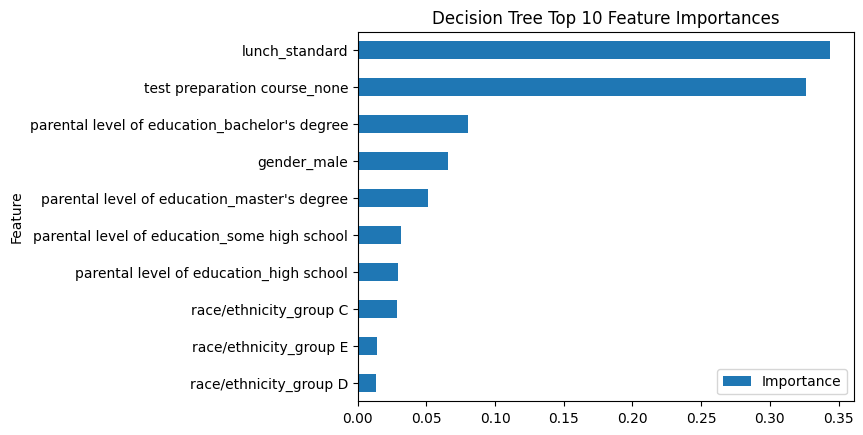

In [16]:
def analyze_features(model, X_train, model_name):
    if hasattr(model, 'coef_'):
        coef_df = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': model.coef_[0]})
        coef_df = coef_df.sort_values('Coefficient', ascending=False)

        print(f"\n=== {model_name} Feature Coefficients ===")
        print(coef_df.head(10))
        print("\nTop Positive Influences:\n", coef_df.head(5))
        print("\nTop Negative Influences:\n", coef_df.tail(5))

        plt.figure(figsize=(10, 6))
        coef_df.sort_values('Coefficient').tail(10).plot.barh(x='Feature', y='Coefficient')
        plt.title(f'{model_name} Top Feature Coefficients')
        plt.show()

    elif hasattr(model, 'feature_importances_'):
        importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': model.feature_importances_})
        importance_df = importance_df.sort_values('Importance', ascending=False)

        print(f"\n=== {model_name} Feature Importances ===")
        print(importance_df.head(10))

        plt.figure(figsize=(10, 6))
        importance_df.head(10).sort_values('Importance').plot.barh(x='Feature', y='Importance')
        plt.title(f'{model_name} Top 10 Feature Importances')
        plt.show()


analyze_features(log_reg, X_train, 'Logistic Regression')
analyze_features(decision_tree, X_train, 'Decision Tree')

                 Model  Accuracy  Precision
0  Logistic Regression      0.68   0.733728
1        Decision Tree      0.66   0.738854

=== Logistic Regression Feature Coefficients ===
                                          Feature  Coefficient
10                                 lunch_standard     1.307227
5   parental level of education_bachelor's degree     0.876102
4                          race/ethnicity_group E     0.841697
3                          race/ethnicity_group D     0.738373
7     parental level of education_master's degree     0.714066
1                          race/ethnicity_group B     0.531072
2                          race/ethnicity_group C     0.375861
8        parental level of education_some college     0.120542
6         parental level of education_high school    -0.402524
9    parental level of education_some high school    -0.414835

Top Positive Influences:
                                           Feature  Coefficient
10                                 

<Figure size 1000x600 with 0 Axes>

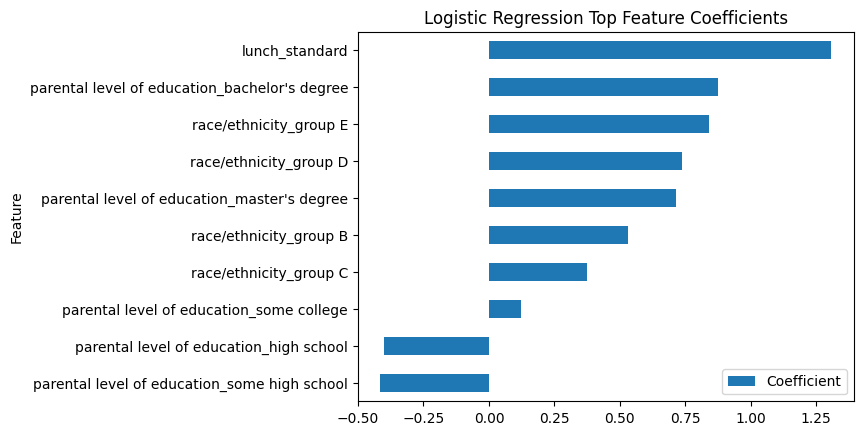

In [18]:
print(comparison_df)
analyze_features(log_reg, X_train, 'Logistic Regression')